In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from altaipony.fakeflares import aflare

import os
CWD = "/".join(os.getcwd().split("/")[:-2])

import pytest

from funcs.model import daylength, on_off, lambert, great_circle_distance, dot_ensemble_circular, full_model
from funcs.helper import no_nan_inf
import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 


import astropy.units as u
from astropy.constants import R_sun

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
NumExpr defaulting to 8 threads.


### Plots 

In [2]:
# plot a grid

#latitudes, longitudes = dot_ensemble(np.pi/2-np.pi/8,np.pi/2-np.pi/10,4,num_pts=1e6)
latitudes, longitudes, pos = dot_ensemble_circular(25/180*np.pi,np.pi/2-np.pi/8,3,num_pts=300)
plt.figure(figsize=(8,8))
plt.scatter(longitudes/np.pi*180, latitudes/np.pi*180)
#plt.scatter([180/2-180/10],[180/2-180/8],)
plt.xlabel("longitude [deg]")
plt.ylabel("latitude [deg]")
#plt.savefig(f"{CWD}/analysis/plots/model/dot_ensemble.png",dpi=300)

Text(0, 0.5, 'latitude [deg]')

In [ ]:
# Plot a model consisting of an ensemble of rotating flaring points on a sphere

I = 65.5 * np.pi / 180.
phi = np.linspace(-2*np.pi,4*np.pi,2000)
ampl = 20
fwhm = 3.
flare = aflare(phi, 2.9, fwhm, ampl,)

lamb, onoff, m = model(phi, latitudes, -longitudes, flare, I)

In [ ]:
plt.figure(figsize=(10,4))
for l,oo in zip(lamb,onoff):
    plt.plot(phi/2/np.pi, l*oo*flare+1, alpha=.1, c="grey")
plt.plot(phi/2/np.pi,m+1,c="k",linewidth=4, label="model light curve")#,\naverage of individual\ngrid dots (in grey)")
plt.plot(phi/2/np.pi,flare+1, label="underlying flare",c="r",linestyle="dashed",linewidth=4)
plt.xlabel("time [rotation periods]",fontsize=20)
plt.ylabel("rel. flux",fontsize=20)
plt.xlim(0,3)
plt.legend(fontsize=20)
#plt.yscale("log")
plt.tight_layout()
#plt.title(f"Flare with rel. amplitude={ampl}, and FWHM={fwhm} rotation periods",fontsize=20)
#plt.savefig(f"{CWD}/analysis/plots/model/rotating_flaring_ensemble_lightcurve.png",dpi=300);


In [ ]:
# create a heatmap of an ensemble of rotating flaring points on a sphere (need the cell above)
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,10))
plt.imshow((lamb*onoff*flare)[:,:], norm=LogNorm(),aspect="auto")
plt.colorbar(label="flux")
plt.xlabel("time",fontsize=15)
plt.ylabel("index of grid dot",fontsize=15)
#plt.savefig(f"{CWD}/analysis/plots/model/rotating_flaring_ensemble_heatmap.png",dpi=300)

In [ ]:
# 10% percent area spot on the stellar surface
percent = 10
num_pts=1e4
indices = np.arange(0, num_pts, dtype=float) + 0.5

phi = np.arccos(1 - 2*indices/num_pts) #latitude
theta = np.pi * (1 + 5**0.5) * indices  #longitude

a = np.where(great_circle_distance(np.pi/3,- np.pi/4, np.pi/2 - phi%(2*np.pi), theta%(np.pi*2))<(percent/180*np.pi))[0]
phi2 = phi[a]
theta2 = theta[a]

x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi);
x2, y2, z2 = np.cos(theta2) * np.sin(phi2), np.sin(theta2) * np.sin(phi2), np.cos(phi2);
ax = plt.figure(figsize=(10,10)).add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=.1);
ax.scatter(x2, y2, z2, s=3.5, c="k");
#plt.savefig(f"{CWD}/analysis/plots/model/10percent_spot_on_a_sphere.png",dpi=300)

In [ ]:
# plot a rotaionally modulated dot-flare
flare = aflare(phi, 1.5, 1.3, 1,)
plt.figure(figsize=(8,16))
l = 80/180*np.pi
I = np.arange(30,91,10)/180*np.pi
for i in I:
    D = daylength(l,i)
    modulation = lambert(phi,i,l)
    #plt.plot(phi/2/np.pi,modulation*on_off(D,phi),label=f"i={i/np.pi*180:.0f}" + r"$^{\circ}$")
    plt.plot(phi/2/np.pi,modulation*on_off(phi,D)*flare + i,label=f"i={i/np.pi*180:.0f}" + r"$^{\circ}$",
            linewidth=2,)
    plt.plot(phi/2/np.pi,flare + i,c="grey",linestyle="dotted")
plt.title(r"bright flaring dot at latitude 80$^{\circ}$ ",fontsize=15)
plt.xlabel("time [rotation periods]",fontsize=15)
plt.ylabel("flux",fontsize=15)
plt.legend(loc=(1.1,0),fontsize=15)
plt.xlim(0,3)
plt.tight_layout()
#plt.savefig(f"{CWD}/analysis/plots/model/rotating_bright_dot_flare.png",dpi=300)

In [ ]:
# plot visibility as a function of day time
plt.figure(figsize=(12,4))
phi = np.linspace(0,6*np.pi,500) #(longitude)
daylengths = np.arange(.1,.91,.2)
for d in daylengths:
    plt.plot(phi/2/np.pi, on_off(phi,d), linewidth=d*2,c="k", label=f"day length / Prot={d:.1f}")
plt.legend(loc=(1.05,0))
plt.xlabel("time [days]")
plt.ylabel("visibility")
plt.tight_layout()
#plt.savefig(f"{CWD}/analysis/plots/model/visibility_vs_day.png",dpi=300)

In [ ]:
# Plot daylengths:

I = np.linspace(0,np.pi/2,10)
L = np.linspace(-np.pi/2,np.pi/2, 500)[::-1]
plt.figure(figsize=(10,6))

    
for i in I:
    dl = []
    for l in L:
        dl.append(daylength(l,i))
    plt.plot(L/np.pi*180,dl,label=f"i={i/np.pi*180:.1f}")
plt.xlabel("latitude ",fontsize=15)
plt.ylabel("daylength",fontsize=15)
plt.ylim(-.1,1.1)
plt.xlim(-90,90)
plt.legend(loc=(1.1,0),fontsize=15)
plt.tight_layout()
#plt.savefig(f"{CWD}/analysis/plots/model/daylength.png",dpi=300)

In [24]:
df = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/summary/lcsi.csv")
inits = pd.read_csv("/home/ekaterina/Documents/001_science/MalachiteMountains/data/summary/inits.csv")
df

,ID,QCS,typ,cadence_min,mission,prefix,origin,h_mission,SpT,view_start,...,tlumerr,kflux,kfluxerr,klum,klumerr,gmag,jmag,kmag,i_mu,i_sigma
0,100004076,14,slc,1,kep,KIC,generic,Kepler,L1,1356.50,...,6.553810e+27,6.712990e-13,4.272880e-14,2.263849e+28,1.444680e+27,17.8356,13.078,11.771,1.002233,0.113213
1,237880881,1,slc,2,tess,TIC,generic,TESS,M5,1331.00,...,5.645140e+29,1.272670e-11,6.844750e-13,3.232358e+30,1.750110e+29,14.9796,11.530,10.636,0.371856,0.040246
2,44984200,10,slc,2,tess,TIC,custom,TESS,M6,1587.25,...,6.480260e+28,2.018160e-11,1.412120e-12,2.979395e+29,2.089910e+28,14.4115,10.309,9.268,0.578452,0.028256
3,277539431,12,slc,2,tess,TIC,custom,TESS,M7,1641.00,...,1.051740e+29,1.380730e-11,1.517240e-12,3.103479e+29,3.444490e+28,14.7381,10.630,9.666,1.520214,0.041615
4,230120143,16,slc,2,tess,TIC,generic,TESS,M7,1741.00,...,3.430260e+29,4.102720e-11,4.508350e-12,1.023014e+30,1.126940e+29,13.5557,9.854,8.950,0.419312,0.017265


In [25]:
for index in [3]:#range(5):
    row = df.loc[index,]

    I = row.i_mu
    ID = int(row.ID)#80 * np.pi / 180.


    valinits = inits[inits.ID ==str(ID)].iloc[-1]
    Fth = valinits.Fth
    R = valinits.R_Rsun * R_sun
    qlum = valinits.qlum_erg_s


    phi = np.linspace(0,6*np.pi,200)
    ampl = 1
    fwhm = 3
    theta = 70 * np.pi / 180.
    phi_a = np.pi
    n = 5
    fig, axes = plt.subplots(nrows=n,ncols=n, figsize=(10,10),)
    AX = [x for ax in axes for x in ax]
    for x, theta in zip(range(n),np.linspace(-I+.1,np.pi/2-.1,n)):
        for y, phi0 in zip(range(n),np.linspace(0,2*np.pi,n)):
            m = full_model(phi_a, theta, ampl, fwhm, I, phi0=phi0,
                          phi=phi, num_pts=100, qlum=qlum*u.erg/u.s,
                          Fth=Fth*u.erg/u.s/(u.cm**2), R=R, median=n)
            AX[n*x + y].plot(phi, m,)
            AX[n*x + y].set_xticks([])
            AX[n*(n-1) + y].set_xticks([5,10,15])
            AX[n*x + y].set_yticks([])
            AX[n*x + 0].set_yticks([5,10])
            AX[n*x + y].text(0.31, 0.75, fr"$\theta_f={theta/np.pi*180:.0f}^\circ$" + "\n" + fr"$\phi_0={phi0/np.pi*.5:.2f}$",
                verticalalignment='bottom', horizontalalignment='left',
                transform=AX[n*x + y].transAxes,
                color='green', fontsize=12)
            AX[n*x + y].set_ylim(.9*n,2.1*n)
            AX[n*x + y].set_xlim(phi[0],phi[-1])
    plt.tight_layout()
    #AX[4] = plt.text
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.0, hspace=.0)
    plt.savefig(f"/home/ekaterina/Documents/001_science/MalachiteMountains/analysis/plots/model/"
                f"{ID}_{I/np.pi*180:.0f}_deg_latitude_flare_compilation_{n}.png", dpi=300)

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [26]:
for index in range(5):
    row = df.loc[index,]

    I = row.i_mu
    ID = int(row.ID)#80 * np.pi / 180.


    valinits = inits[inits.ID ==str(ID)].iloc[-1]
    Fth = valinits.Fth
    R = valinits.R_Rsun * R_sun
    qlum = valinits.qlum_erg_s


    phi = np.linspace(0,6*np.pi,200)
    ampl = 1
    fwhm = 3
    theta = 70 * np.pi / 180.
    phi_a = np.pi
    s = 20
    Theta, Phi0, Maxamp = np.full(s**2,0),np.full(s**2,0),np.full(s**2,0)
    theta_phi0 = np.meshgrid(np.linspace(-I,np.pi/2,s),np.linspace(0,2*np.pi,s))
    positions = np.vstack(map(np.ravel, theta_phi0))
    L = np.array(list(map(lambda x: np.max(full_model(phi_a, x[0], ampl, fwhm, I, phi0=x[1],
                              phi=phi, num_pts=100, qlum=qlum*u.erg/u.s,
                              Fth=Fth*u.erg/u.s/(u.cm**2), R=R, median=10)),positions.T)))
    d = pd.DataFrame({"theta":positions[0],"phi0":positions[1],"maxamp":L,})
    plt.figure(figsize=(8,6))
    plt.scatter(d.theta/np.pi*180, (d.maxamp-10)/10., s=50, alpha=.3, label=f"$i = {I/np.pi*180:.0f}^\circ$")
    plt.xlim(-90, 90)#I/np.pi*180
    plt.ylim(0,1)
    plt.xlabel(r"$\theta_f$ [deg]", fontsize=14)
    plt.ylabel(r"$a$", fontsize=14)
    plt.tight_layout()
    plt.legend(loc=2, frameon=False)
    plt.savefig(f"/home/ekaterina/Documents/001_science/MalachiteMountains/analysis/plots/model/"
                f"{ID}_{I/np.pi*180:.0f}_deg_latitude_flare_compilation_scatter.png", dpi=300)
    plt.close()

<>:28: DeprecationWarning: invalid escape sequence \c
<>:28: DeprecationWarning: invalid escape sequence \c
<>:28: DeprecationWarning: invalid escape sequence \c
<ipython-input-26-2ac3232346b1>:28: DeprecationWarning: invalid escape sequence \c
  plt.scatter(d.theta/np.pi*180, (d.maxamp-10)/10., s=50, alpha=.3, label=f"$i = {I/np.pi*180:.0f}^\circ$")
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, 

In [32]:
for index in range(5):
    row = df.loc[index,]

    I = row.i_mu
    ID = int(row.ID)#80 * np.pi / 180.


    valinits = inits[inits.ID ==str(ID)].iloc[-1]
    Fth = valinits.Fth
    R = valinits.R_Rsun * R_sun
    qlum = valinits.qlum_erg_s


    phi = np.linspace(0,6*np.pi,200)
    ampl = 1
    fwhm = 3
    theta = 70 * np.pi / 180.
    phi_a = np.pi
    s = 30
    Theta, Phi0, Maxamp = np.full(s**2,0),np.full(s**2,0),np.full(s**2,0)
    thetagrid = np.random.rand(s**2)*(np.pi/2 + I) - I
    phigrid = np.random.rand(s**2)*2*np.pi/2
    positions = np.array([thetagrid,phigrid])

    secL = np.array(list(map(lambda x: func(x),positions.T)))
    primL = np.array(list(map(lambda x: np.max(full_model(phi_a, x[0], ampl, fwhm, I, phi0=x[1],
                              phi=phi, num_pts=100, qlum=qlum*u.erg/u.s,
                              Fth=Fth*u.erg/u.s/(u.cm**2), R=R, median=10)),positions.T)))
    d = pd.DataFrame({"theta":positions[0],"phi0":positions[1],"maxamp":primL,"secondmax":secL})
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,6))

    plt.scatter(d.theta/np.pi*180, (d.maxamp-10)/10., s=50, alpha=.3,
                label=f" prim. max. at $i ={I/np.pi*180:.0f}^\circ$", c="r")
    plt.scatter(d.theta/np.pi*180, (d.secondmax-10)/10., s=50, alpha=.3,
                label=f"sec. max at $i ={I/np.pi*180:.0f}^\circ$", c="b")
#     plt.scatter(d.theta/np.pi*180, (d.secondmax-10)/(d.maxamp-10), s=50, alpha=.3,
#             label=f"sec./prim. max at $i ={I/np.pi*180:.0f}^\circ$", c="b")
    plt.xlim(-90, 90)#I/np.pi*180
    plt.ylim(0,1)
    plt.xlabel(r"$\theta_f$ [deg]", fontsize=14)
    plt.ylabel(r"$a$", fontsize=14)
    plt.tight_layout()
    plt.legend(loc=2, frameon=False)
    plt.savefig(f"/home/ekaterina/Documents/001_science/MalachiteMountains/analysis/plots/model/"
                f"{ID}_{I/np.pi*180:.0f}_deg_latitude_flare_compilation_scatter_2.png", dpi=300)
    plt.close()

<>:33: DeprecationWarning: invalid escape sequence \c
<>:35: DeprecationWarning: invalid escape sequence \c
<>:33: DeprecationWarning: invalid escape sequence \c
<>:35: DeprecationWarning: invalid escape sequence \c
<>:33: DeprecationWarning: invalid escape sequence \c
<>:35: DeprecationWarning: invalid escape sequence \c
<ipython-input-32-925819faa8fe>:33: DeprecationWarning: invalid escape sequence \c
  label=f" prim. max. at $i ={I/np.pi*180:.0f}^\circ$", c="r")
<ipython-input-32-925819faa8fe>:35: DeprecationWarning: invalid escape sequence \c
  label=f"sec. max at $i ={I/np.pi*180:.0f}^\circ$", c="b")
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


In [28]:
def func(x):
    m = full_model(phi_a, x[0], ampl, fwhm, I, phi0=x[1],
                              phi=phi, num_pts=100, qlum=qlum*u.erg/u.s,
                              Fth=Fth*u.erg/u.s/(u.cm**2), R=R, median=10)
    peaks = find_peaks(m)[0]
    if len(peaks) > 1:
        return np.sort(m[peaks])[-2]
    else: 
        return 10

In [30]:
from scipy.signal import find_peaks
import seaborn as sns

In [77]:
dindex = {}

for index in [1,3]:
    row = df.loc[index,]

    I = row.i_mu
    ID = int(row.ID)#80 * np.pi / 180.


    valinits = inits[inits.ID ==str(ID)].iloc[-1]
    Fth = valinits.Fth
    R = valinits.R_Rsun * R_sun
    qlum = valinits.qlum_erg_s


    phi = np.linspace(0,6*np.pi,200)
    ampl = 1
    fwhm = 3
    theta = 70 * np.pi / 180.
    phi_a = np.pi
    s = 30
    Theta, Phi0, Maxamp = np.full(s**2,0),np.full(s**2,0),np.full(s**2,0)
    thetagrid = np.random.rand(s**2)*(np.pi/2 + I) - I
    phigrid = np.random.rand(s**2)*2*np.pi/2
    positions = np.array([thetagrid,phigrid])

    secL = np.array(list(map(lambda x: func(x)-10,positions.T)))
    primL = np.array(list(map(lambda x: np.max(full_model(phi_a, x[0], ampl, fwhm, I, phi0=x[1],
                              phi=phi, num_pts=100, qlum=qlum*u.erg/u.s,
                              Fth=Fth*u.erg/u.s/(u.cm**2), R=R, median=10))-10,positions.T)))
    d = pd.DataFrame({"theta":positions[0],"phi0":positions[1],"maxamp":primL,"secondmax":secL})
    d["detectability_1"] = d.maxamp/10 + d.secondmax/10 + d.secondmax/d.maxamp *10
    d["detectability_2"] = d.maxamp/10 + d.secondmax/10
    dindex[ID] = d

In [78]:
dindex[237880881].sort_values(by="theta")

,theta,phi0,maxamp,secondmax,detectability_1,detectability_2
656,-0.370644,2.267288,0.245887,0.071672,2.946583,0.031756
559,-0.369619,0.852006,0.100005,0.029121,2.924839,0.012913
291,-0.369163,2.150099,0.199304,0.075055,3.793276,0.027436
719,-0.368413,1.074812,0.095310,0.028044,2.954696,0.012335
831,-0.368315,2.318487,0.276390,0.072896,2.672370,0.034929
...,...,...,...,...,...,...
322,1.561568,2.582649,8.958832,0.000000,0.895883,0.895883
317,1.561868,1.829929,8.941247,0.000000,0.894125,0.894125
156,1.562151,0.414675,8.902238,0.000000,0.890224,0.890224
845,1.567362,0.563024,8.919050,0.000000,0.891905,0.891905


(-90.0, 90.0)

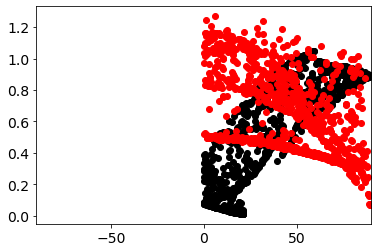

In [90]:
dd = dindex[237880881]
plt.scatter(dd.theta/np.pi*180, dd.detectability_2, c="k")

dd = dindex[277539431]
plt.scatter(dd.theta/np.pi*180, dd.detectability_2, c="r")


plt.xlim(-90,90)

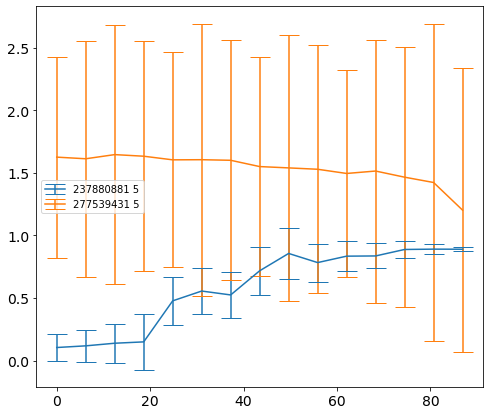

In [92]:
cut_bins = np.linspace(-np.pi/2,np.pi/2,30)
cut_labels_4 = (cut_bins[:-1] + cut_bins[1:]) / 2.

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,7))
for key in dindex.keys():
    for factor in [5]:
        dd = dindex[key]
        dd.theta = np.abs(dd.theta)
        d["detectability_2"] = d.maxamp/10 + d.secondmax/10 + d.secondmax/d.maxamp * factor
        dd['cut_ex1'] = pd.cut(dd["theta"], bins=cut_bins, labels=cut_labels_4)
        ddd = dd.groupby("cut_ex1").median()
        ddd2 = dd.groupby("cut_ex1").std()
        ax.errorbar(ddd.index.astype(float) / np.pi * 180, ddd.detectability_2, 
                    yerr=ddd2.detectability_2, label=f"{key} {factor}", capsize=10)
plt.legend()

# Visibility of latitudes

In [ ]:
incls = np.linspace(0,90,20)
lats = np.linspace()

In [7]:
(0.1 * np.pi * R_sun / (100 * u.km / u.s)).to("min")

<Quantity 36.42676682 min>